In [156]:
import pandas as pd
import sklearn as sns
from sklearn.model_selection import train_test_split

In [134]:
data=pd.read_csv('sample_data/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [147]:
data.shape

(891, 12)

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Normalize the data

In [135]:
feature_names=["Pclass","Sex","SibSp","Parch"]
features=pd.get_dummies(data[feature_names])
target=data["Survived"]

In [137]:
data_scaled=features.copy()
for column in data_scaled.columns:
  data_scaled[column]=(data_scaled[column]-data_scaled[column].std(ddof=0))

In [150]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [151]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [153]:
data['Survived'].value_counts

<bound method IndexOpsMixin.value_counts of 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64>

<Axes: xlabel='Survived', ylabel='count'>

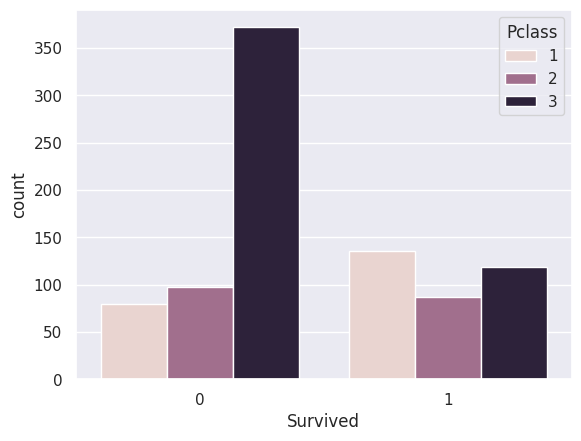

In [154]:
sns.countplot(x=data['Survived'],hue=data['Pclass'])

<Axes: xlabel='Sex', ylabel='count'>

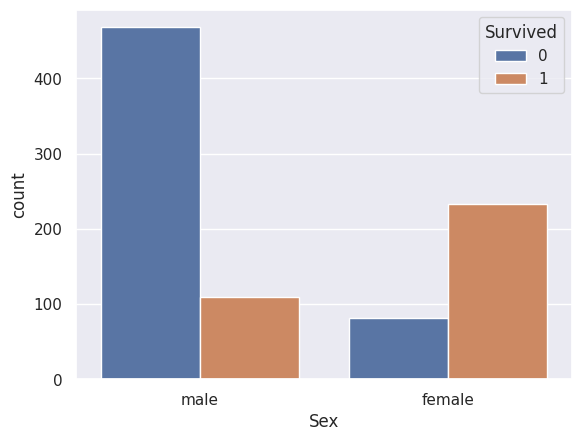

In [155]:
sns.countplot(x=data['Sex'],hue=data['Survived'])

Split the data

In [139]:
X_train,X_test,Y_train,Y_test=train_test_split(data_scaled,target,test_size=0.80,random_state=1)

In [ ]:
models=[]
accuracies=[]

Logistic Regression

In [140]:
from sklearn.linear_model import LogisticRegression

In [142]:
model=LogisticRegression()


In [143]:
model.fit(X_train,Y_train)

LogisticRegression()

In [145]:
predictions=model.predict(X_test)
accu=sum(predictions==Y_test)/Y_test.shape[0]*100


In [146]:
f'Accuracy with Logistic Regression:{accu:2f}%'

'Accuracy with Logistic Regression:79.242637%'